<IPython.core.display.Javascript object>


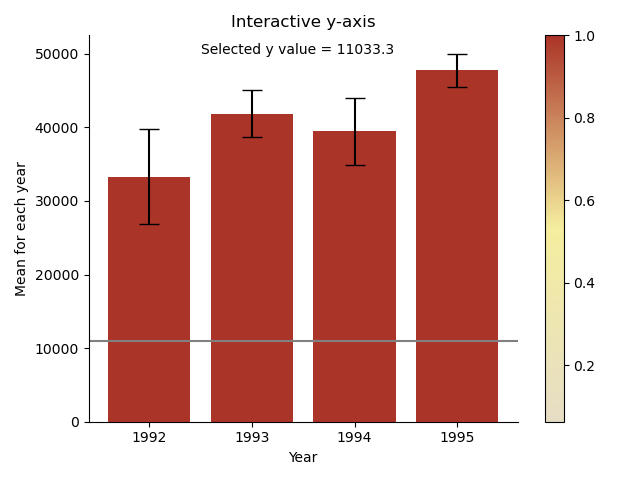

9

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm


np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

means = df.mean(axis = 1)# returns series filled with means of rows
stdz = df.std(axis=1)#returns series filled with starndad deviations of rows 

sample_size = 3650


yeer = stdz/np.sqrt(sample_size)*ss.norm.ppf(1-0.05/2)
   
confidence_intervalz = [ss.norm.interval(alpha=0.95, loc = mu, scale = se) for mu,se in zip(means, stdz/np.sqrt(sample_size))]#list comprehension to calculate confidence interval

y = 39000


def compute_prb(z,conf_int):
    if z < np.min(conf_int):
        ans  = 1
    elif z > np.max(conf_int):
        ans = 0 
    else:
        ans = (np.max(conf_int) - z)/(np.max(conf_int) - np.min(conf_int))
    return ans


prbz = [compute_prb(y,c) for c in confidence_intervalz]   


cm1 = col.LinearSegmentedColormap.from_list("colormap",["#E6DDC5","#F5EE9E", "#AB3428"])#genarates a smoothly vaying linear color map
cpick = cm.ScalarMappable(cmap=cm1)#builds and customize standalone colorbars, i.e. without an attached plot.
cpick.set_array([])


plt.figure()
plt.ion()

plt.bar(range(len(df)),means,
               yerr = yeer,color = cpick.to_rgba(prbz),capsize = 7)

plt.colorbar(cpick,orientation = 'vertical')

[plt.gca().spines[loc].set_visible(False) for loc in ['top','right']]

line_valueofintrest = plt.axhline(y=y, color = 'gray')

plt.title('Interactive y-axis')
plt.xlabel('Year')
plt.ylabel('Mean for each year')

plt.xticks(range(len(df)),df.index)
y_text = plt.text(0.5,50000,'Default y value = {}'.format(y))

plt.tight_layout()
plt.show()

def onclick(event):
   
    a = event.ydata
    prbzo = [compute_prb(a,c) for c in confidence_intervalz]  
    
    plt.clf()
    
    y_text = plt.text(0.5,50000,'Selected y value = {0:.1f}'.format(a))
    plt.bar(range(len(df)),means,yerr = yeer,color = cpick.to_rgba(prbzo),capsize = 7)  
    plt.colorbar(cpick,orientation = 'vertical')

    [plt.gca().spines[loc].set_visible(False) for loc in ['top','right']]

    line_valueofintrest = plt.axhline(y=a, color = 'gray')

    plt.title('Interactive y-axis')
    plt.xlabel('Year')
    plt.ylabel('Mean for each year')

    plt.xticks(range(len(df)),df.index)
    
    plt.tight_layout()
    plt.show()
        
plt.gcf().canvas.mpl_connect('button_press_event', onclick)